In [1]:
# 将文本文档组合为一个CSV文件
import pyprind
import pandas as pd
import os
pbar = pyprind.ProgBar(19997)

labels = {'alt.atheism':1, 
         'comp.graphics':2,
         'comp.os.ms-windows.misc':3,
         'comp.sys.ibm.pc.hardware':4,
         'comp.sys.mac.hardware':5,
         'comp.windows.x':6,
         'misc.forsale':7,
         'rec.autos':8,
         'rec.motorcycles':9,
         'rec.sport.baseball':10,
         'rec.sport.hockey':11,
         'sci.crypt':12,
         'sci.electronics':13,
         'sci.med':14,
         'sci.space':15,
         'soc.religion.christian':16,
         'talk.politics.guns':17,
         'talk.politics.mideast':18,
         'talk.politics.misc':19,
         'talk.religion.misc':20}
df = pd.DataFrame()

for l in labels.keys():
    path = './20news-19997/20_newsgroups/%s' % l
    for file in os.listdir(path):
        with open(os.path.join(path, file), 'rb') as infile:  
            txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index=True)
            pbar.update()
df.columns = ['content', 'category']

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:21


In [2]:
import numpy as np
np.random.seed(0)
df = df.reindex(np.random.permutation(df.index))
df.to_csv('./20news-19997/20_newsgroups.csv', index=False)
df = pd.read_csv('./20news-19997/20_newsgroups.csv')
df.head(3)

,content,category
0,"b""Path: cantaloupe.srv.cs.cmu.edu!crabapple.sr...",6
1,b'Xref: cantaloupe.srv.cs.cmu.edu sci.med:5897...,14
2,b'Path: cantaloupe.srv.cs.cmu.edu!magnesium.cl...,17


In [3]:
#统计训练集和测试集中20种类标的个数
df['category'].value_counts().plot(kind='bar')

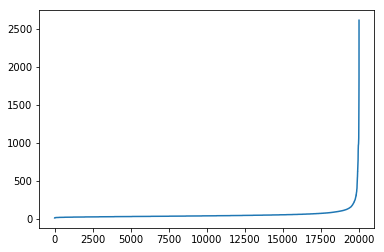

In [4]:
#统计文本文档的行数
import matplotlib.pyplot as plt
lines = []

for l in labels.keys():
    path = './20news-19997/20_newsgroups/%s' % l
    for file in os.listdir(path):
        with open(os.path.join(path, file), 'rb') as infile:  
            lines_txt = len(infile.readlines())
            lines.append(lines_txt)
            
plt.plot(sorted(lines))

In [5]:
#找出列表中位数
lst = sorted(lines)
print(len(lst))
print(lst[len(lst)//2])

19997
35


In [6]:
#清洗文本数据
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower())
    return text

df['content'] = df['content'].apply(preprocessor)
df.head(3)

,content,category
0,b path cantaloupe srv cs cmu edu crabapple srv...,6
1,b xref cantaloupe srv cs cmu edu sci med 58979...,14
2,b path cantaloupe srv cs cmu edu magnesium clu...,17


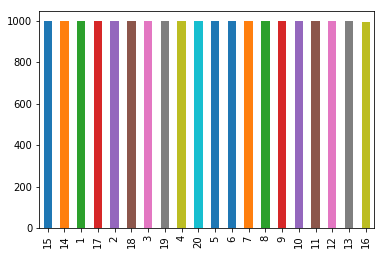

In [7]:
#获取部分数据训练和测试
df_1 = pd.DataFrame()
df_1 = df
df_1.head(3)

df_1['category'].value_counts().plot(kind='bar')

In [8]:
X = df_1.loc[:, 'content'].values
y = df_1.loc[:, 'category'].values

# 停用词移除
#new_list = []
#update_list = []
#for i in range(999):
#    new_list = tokenizer(X[i])
#    for each in new_list:
#        if each not in stop:
#            update_list.append(each)
#    X[i] = " ".join(update_list)

In [9]:
from sklearn.cross_validation import train_test_split
from gensim.models.word2vec import Word2Vec

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def cleanText(corpus):
    corpus = [z.lower().replace('\n','').split() for z in corpus]
    return corpus

X_train = cleanText(X_train)
X_test = cleanText(X_test)

n_dim = 300
news_w2v = Word2Vec(size=n_dim, min_count=10)
news_w2v.build_vocab(X_train)

news_w2v.train(X_train, total_examples=news_w2v.corpus_count, epochs=news_w2v.epochs)

C:\Users\withj\Anaconda2\envs\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\withj\Anaconda2\envs\python36\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


(23627032, 31139970)

In [10]:
print(news_w2v.most_similar("computer", topn = 20))

[('ncomputer', 0.7031093835830688), ('computing', 0.5895137786865234), ('advanced', 0.5630830526351929), ('silicon', 0.5627012848854065), ('inc', 0.5571417808532715), ('software', 0.5520400404930115), ('lab', 0.5501877069473267), ('consulting', 0.5450396537780762), ('voice', 0.5423088073730469), ('technologies', 0.5408635139465332), ('accelerator', 0.5401817560195923), ('manufacturing', 0.5367072820663452), ('systems', 0.5284115672111511), ('facility', 0.5232654809951782), ('company', 0.51976478099823), ('library', 0.5186460614204407), ('engineering', 0.5128361582756042), ('instruments', 0.5064715147018433), ('products', 0.5059275031089783), ('corporation', 0.5056624412536621)]


C:\Users\withj\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\withj\Anaconda2\envs\python36\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [11]:
print(news_w2v.most_similar("atheism", topn = 20))

[('conspiracy', 0.796660304069519), ('magick', 0.781158983707428), ('pagan', 0.7483187317848206), ('folklore', 0.6848101019859314), ('psychoactives', 0.6811968088150024), ('del', 0.6780948638916016), ('nliefting', 0.660977303981781), ('sex', 0.6269114017486572), ('religion', 0.6246612071990967), ('kibology', 0.6203559637069702), ('rush', 0.5801657438278198), ('teens', 0.5725789070129395), ('activism', 0.5624344944953918), ('lucio', 0.5571883916854858), ('origins', 0.5566462278366089), ('limbaugh', 0.5525323152542114), ('proxima', 0.5429709553718567), ('personality', 0.5372399687767029), ('abortion', 0.5203955173492432), ('bondage', 0.5192568302154541)]


C:\Users\withj\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\withj\Anaconda2\envs\python36\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [12]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text:
        try:
            vec += news_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count!= 0:
        vec /= count
    return vec

In [13]:
from sklearn.preprocessing import scale
train_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X_train])
train_vecs = scale(train_vecs)

news_w2v.train(X_test, total_examples=news_w2v.corpus_count, epochs=news_w2v.epochs)

C:\Users\withj\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(5884281, 7779955)

In [14]:
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X_test])
test_vecs = scale(test_vecs)

C:\Users\withj\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [23]:
from sklearn.linear_model import SGDClassifier
from time import time
lr = SGDClassifier(loss='log', penalty='l1')
start = time()
lr.fit(train_vecs, y_train)
end = time()
print("Train time:", end-start)
print('Test accuracy: %.2f' %lr.score(test_vecs, y_test))

C:\Users\withj\Anaconda2\envs\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Train time: 8.441001892089844
Test accuracy: 0.74


In [19]:
# 使用朴素贝叶斯模型
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from time import time

clf = GaussianNB()
start = time()
clf.fit(train_vecs, y_train)
end = time()
train_time = end - start
print("train time:", train_time)

start = time()
print('Accuracy: %.2f' % clf.score(test_vecs, y_test))
end = time()
test_time = end - start
print("test time:", test_time)

train time: 0.1887965202331543
Accuracy: 0.40
test time: 0.6305866241455078


In [20]:
# 使用决策树模型训练
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

def fit_model(X, y):
    cross_validator = KFold(n_splits=3)
    regressor = DecisionTreeRegressor()
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator=regressor,
                       param_grid=params,
                       scoring=scoring_fnc,
                       cv=cross_validator)
    grid = grid.fit(X, y)
    return grid.best_estimator_

start = time()
optimal_reg = fit_model(train_vecs, y_train)
end = time()
train_time = end - start
print("train time:", train_time)
print("Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth']))

train time: 131.06504797935486
Parameter 'max_depth' is 6 for the optimal model.


In [21]:
from sklearn.metrics import classification_report
y_pred = optimal_reg.predict(test_vecs)
r2 = performance_metric(y_test, y_pred)
print("Optimal model has R^2 score {:,.2f} on test data".format(r2))
print(optimal_reg.score(test_vecs, y_test))

Optimal model has R^2 score 0.44 on test data
0.4380134532133847


In [22]:
# 使用支持向量机
from sklearn.metrics import accuracy_score
from time import time
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear',random_state=0)

start = time()
clf_svc.fit(train_vecs, y_train)
end = time()
train_time = end - start
print('train_time:', train_time)

y_pred2 = clf_svc.predict(test_vecs)
print('accuracy:', accuracy_score(y_test, y_pred2))

train_time: 80.99361681938171
accuracy: 0.744
